# DS1000C Rigol Waveform Examples

**Scott Prahl**

**Mar 2021**

> If <a href="https://jupyter.org">Jupyter</a> is not installed on your computer, then this notebook can be run, modified, and saved in the <a href="https://colab.research.google.com/notebooks/intro.ipynb">Google Colaboratory</a> environment.  This free service uses your web browser, requires zero configuration, and runs entirely in the cloud. 
>
> <a href="https://colab.research.google.com/github/scottprahl/RigolWFM/blob/master/docs/1-DS1000C-Waveforms.ipynb">Open in Colab</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol
except ModuleNotFoundError:
    print('RigolWFM not installed. To install, uncomment and run the cell below.')
    print('Once installation is successful, rerun this cell again.')

repo = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/"

In [ ]:
#!pip install RigolWFM

## Introduction

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS1202CA scope.  

A single `.wfm` files is examined.

The list of Rigol scopes that should produce the same file format are:

In [2]:
print(rigol.DS1000C_scopes[:])

['C', '1000C', 'DS1000C', 'DS1000CD', 'DS1000C', 'DS1000MD', 'DS1000M', 'DS1302CA', 'DS1202CA', 'DS1102CA', 'DS1062CA']


## DS1202CA

We will start with a `.wfm` file from a Rigol DS1202CA scope. 


### Now for the `.wfm` data

First a textual description.

In [3]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1202CA-A.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000C')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1202CA-A.wfm?raw=true'
    General:
        File Model   = wfm1000c
        User Model   = 1000C
        Parser Model = wfm1000c
        Firmware     = unknown
        Filename     = DS1202CA-A.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =  unknown
            Scale =   200.00 mV/div
           Offset =  -608.00 mV
            Probe =       1X
         Inverted =    False

        Time Base =   10.000 ms/div
           Offset =   -1.600 ms
            Delta =  100.000 µs/point
           Points =     5120

         Count    = [        1,        2,        3  ...      5119,     5120]
           Raw    = [      198,      198,      198  ...       192,      192]
           Times  = [-257.600 ms,-257.500 ms,-257.400 ms  ... 254.300 ms,254.400 ms]
           Volts  = [ 40.00 mV, 40.00 mV, 40.00 mV  ...  88.00 mV, 88.00 mV]

     Channel 2:
         Coupling =  unknown
            Scale =   500.00 mV/

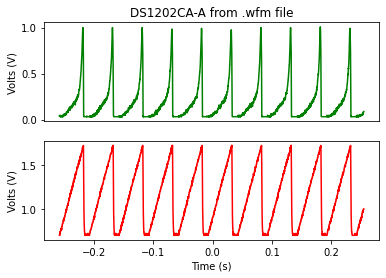

In [4]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times, ch.volts, color='green')
plt.title("DS1202CA-A from .wfm file")
plt.ylabel("Volts (V)")
#plt.xlim(-0.6,0.6)

plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times, ch.volts, color='red')
plt.xlabel("Time (s)")
plt.ylabel("Volts (V)")
#plt.xlim(-0.6,0.6)

plt.show()